In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch
import pyrtools as pt
import plenoptic as po
import scipy.io as sio
import os.path as op
import glob
directory = '/Users/kathrynbonnen/Dropbox/NYU/Texture2018/imageLibraries/cropped512-gray-jpg/'
%load_ext autoreload
%autoreload 2



torch.__version__
numpy = lambda x: x.detach().cpu().numpy().squeeze()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

torch.cat([torch.ones(3).flatten(),torch.ones(3).flatten(),torch.ones(3).flatten()])

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [11]:
image = plt.imread(directory+'5DmkII_3874.jpg').astype(float).mean(axis=2)/255.
initial_image = np.random.rand(256,256) #plt.imread('onef.jpg').astype(float)/255.
im0 = torch.tensor(image, requires_grad=True, dtype = torch.float32).squeeze().unsqueeze(0).unsqueeze(0)    
model = po.simul.Portilla_Simoncelli([256,256],n_scales=4, n_orientations=4, spatial_corr_width=9,use_true_correlations=True)
met = po.synth.Metamer(im0[0,0,:256,:256], model)
m=met.synthesize(learning_rate=.005,loss_thresh=20,loss_change_thresh=100,max_iter=500,
                 coarse_to_fine='together',optimizer='Adam',clamper=None, initial_image=initial_image)

# set store_progress = True or integer values

 71%|███████▏  | 357/500 [04:39<01:52,  1.28it/s, current_scale=all, current_scale_loss=0.774, gradient_norm=5.1089e-01, learning_rate=0.00125, loss=7.7388e-01]             


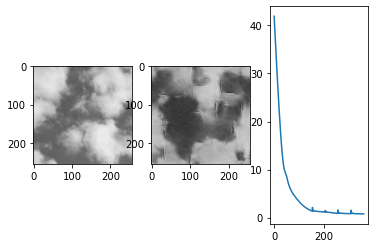

In [12]:
fig=plt.figure()
fig.add_subplot(1,3,1)
plt.imshow(image[:256,:256],cmap='gray',vmin=0,vmax=1)

fig.add_subplot(1,3,2)
plt.imshow(m[0].squeeze().detach().numpy(),cmap='gray',vmin=0,vmax=1)

fig.add_subplot(1,3,3)
plt.plot(met.loss)

fig.savefig('tmp3.jpg')

In [4]:
# met.plot_synthesis_status(); 
# model.plot_representation()
vec=model.convert_to_vector()
model.convert_to_dict(vec)
print(model.representation['magnitude_means'].keys())
print(['residual_lowpass'] + [s for s in model.scales[1:-2] for i in range(0,model.n_orientations)] + ['residual_highpass'])

['residual_lowpass', (0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3), 'residual_highpass']
odict_keys(['residual_highpass', (0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3), 'residual_lowpass'])
['residual_lowpass', 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 'residual_highpass']


In [28]:
print(model.pyr_coeffs.keys())

odict_keys(['residual_highpass', (0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3), 'residual_lowpass'])


In [14]:

image = plt.imread(directory+'5DmkII_3975.jpg').astype(float).mean(axis=2)/255.
initial_image = .495 +.01*np.random.rand(256,256) #plt.imread('onef.jpg').astype(float)/255.
im0 = torch.tensor(image, requires_grad=True, dtype = torch.float32).squeeze().unsqueeze(0).unsqueeze(0)    
model = po.simul.Portilla_Simoncelli([256,256],n_scales=4, n_orientations=4, spatial_corr_width=13,use_true_correlations=True)
met = po.synth.Metamer(im0[0,0,:256,:256], model)
m=met.synthesize(learning_rate=.01,loss_thresh=20,loss_change_thresh=100,max_iter=600,
                 optimizer='Adam',clamper=None, initial_image=initial_image)




  8%|▊         | 51/600 [00:38<06:53,  1.33it/s, gradient_norm=3.3884e-01, learning_rate=0.01, loss=3.6991e+00]


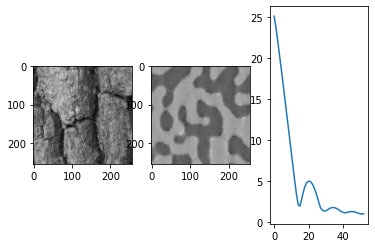

In [12]:
fig=plt.figure()
fig.add_subplot(1,3,1)
plt.imshow(image[:256,:256],cmap='gray',vmin=0,vmax=1)

fig.add_subplot(1,3,2)
plt.imshow(m[0].squeeze().detach().numpy(),cmap='gray',vmin=0,vmax=1)

fig.add_subplot(1,3,3)
plt.plot(met.loss)

fig.savefig('tmp3.jpg')

In [38]:
print(n)

[1.08017853e+02 8.47959458e+03 5.63459299e-01 ... 0.00000000e+00
 0.00000000e+00 1.11209554e+02]
